<a href="https://colab.research.google.com/github/GreJerdev/Y-data/blob/master/dl/home_work3/DL_word_embedding_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word Embedding - Home Assigment
## Dr. Omri Allouche 2018. YData Deep Learning Course

[Open in Google Colab](https://colab.research.google.com/github/omriallouche/deep_learning_course/blob/master/DL_word_embedding_assignment.ipynb)
    
    
In this exercise, you'll use word vectors trained on a corpus of 380,000 lyrics of songs from MetroLyrics (https://www.kaggle.com/gyani95/380000-lyrics-from-metrolyrics).  
The dataset contains these fields for each song, in CSV format:
1. index
1. song
1. year
1. artist
1. genre
1. lyrics

Before doing this exercise, we recommend that you go over the "Bag of words meets bag of popcorn" tutorial (https://www.kaggle.com/c/word2vec-nlp-tutorial)

Other recommended resources:
- https://rare-technologies.com/word2vec-tutorial/
- https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial

### Train word vectors
Train word vectors using the Skipgram Word2vec algorithm and the gensim package.
Make sure you perform the following:
- Tokenize words
- Lowercase all words
- Remove punctuation marks
- Remove rare words
- Remove stopwords

Use 300 as the dimension of the word vectors. Try different context sizes.

In [1]:
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup  
import re
import nltk

In [2]:
# Read data from files 
data = pd.read_csv( "lyrics.csv", header=0, delimiter="," )

# Verify the number of row that were read (2,173,422 in total)
print ("Read %d labeled data reviews" % (data.size))
data.head()

Read 2173422 labeled data reviews


,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [3]:
data.genre.unique()

array(['Pop', 'Hip-Hop', 'Not Available', 'Other', 'Rock', 'Metal',
       'Country', 'Jazz', 'Electronic', 'Folk', 'R&B', 'Indie'],
      dtype=object)

In [4]:
len(data["lyrics"])


362237

In [3]:
# Load the punkt tokenizer
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

from nltk.corpus import stopwords
def lyrics_to_wordlist( lyrics, remove_stopwords=False ):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    #
    # 1. Remove HTML
    lyrics_text = BeautifulSoup(lyrics).get_text()
    #  
    # 2. Remove non-letters
    lyrics_text = re.sub("[^a-zA-Z]"," ", lyrics_text)
    #
    # 3. Convert words to lower case and split them
    words = lyrics_text.lower().split()
    #
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    #
    # 5. Return a list of words
    return(words)

# Define a function to split a review into parsed sentences
def lyrics_to_sentences( lyrics, tokenizer, remove_stopwords=False ):
    # Function to split a review into parsed sentences. Returns a 
    # list of sentences, where each sentence is a list of words
    #
    # 1. Use the NLTK tokenizer to split the paragraph into sentences
    if(len(lyrics)== 0):
        return []
    raw_sentences = tokenizer.tokenize(lyrics.strip())
    #
    # 2. Loop over each sentence
    sentences = []
    for raw_sentence in raw_sentences:
        # If a sentence is empty, skip it
        if len(raw_sentence) > 0:
            # Otherwise, call review_to_wordlist to get a list of words
            sentences.append( lyrics_to_wordlist( raw_sentence, \
              remove_stopwords ))
    #
    # Return the list of sentences (each sentence is a list of words,
    # so this returns a list of lists
    return sentences

In [6]:
sentences = []  # Initialize an empty list of sentences

print ("Parsing sentences from training set")
counter = 0
total_number_of_rows = len(data["lyrics"])
for lyrics in data["lyrics"]:
    counter +=1
    if(lyrics == lyrics):  
        if counter % 5000 == 0:
            print(f'{counter}/{total_number_of_rows}')
        sentences += lyrics_to_sentences(lyrics, tokenizer)

Parsing sentences from training set


/home/g/.local/lib/python3.6/site-packages/bs4/__init__.py:314: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


5000/362237


/home/g/.local/lib/python3.6/site-packages/bs4/__init__.py:314: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


25000/362237
40000/362237
45000/362237
50000/362237


/home/g/.local/lib/python3.6/site-packages/bs4/__init__.py:314: UserWarning: "b'/'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


75000/362237
80000/362237
85000/362237
95000/362237
100000/362237
105000/362237
110000/362237
115000/362237
125000/362237
130000/362237
135000/362237
140000/362237
145000/362237


/home/g/.local/lib/python3.6/site-packages/bs4/__init__.py:314: UserWarning: "b'//'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


160000/362237
165000/362237
170000/362237
175000/362237
180000/362237
190000/362237
195000/362237
200000/362237
205000/362237
215000/362237
220000/362237
225000/362237
230000/362237
235000/362237
240000/362237
245000/362237
250000/362237
255000/362237
260000/362237
265000/362237
270000/362237
275000/362237
280000/362237
285000/362237
290000/362237
295000/362237


/home/g/.local/lib/python3.6/site-packages/bs4/__init__.py:314: UserWarning: "b'/.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


300000/362237
305000/362237
310000/362237
315000/362237
320000/362237
325000/362237
330000/362237
340000/362237
345000/362237
350000/362237
355000/362237
360000/362237


In [7]:
import pickle
# Step 2
with open('sentences.b', 'wb') as config_dictionary_file:
  # Step 3
  pickle.dump(sentences, config_dictionary_file)

In [9]:
# Set values for various parameters
num_features = 3000    # Word vector dimensionality                      
min_word_count = 30   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print ("Training model...")
model = word2vec.Word2Vec(sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "300features_40minwords_10context"
model.save(model_name)

Training model...


In [6]:
from gensim.models import word2vec
model = word2vec.Word2Vec.load("300features_40minwords_10context")

### Review most similar words
Get initial evaluation of the word vectors by analyzing the most similar words for a few interesting words in the text. 

Choose words yourself, and find the most similar words to them.

In [6]:
model.wv.most_similar("country")

[('nashville', 0.4711722433567047),
 ('texas', 0.42542052268981934),
 ('hillbilly', 0.425087571144104),
 ('farm', 0.4209102392196655),
 ('southern', 0.41700053215026855),
 ('tennessee', 0.4128624498844147),
 ('homegrown', 0.40444791316986084),
 ('western', 0.4026687443256378),
 ('illinois', 0.3990497291088104),
 ('carolina', 0.3977320194244385)]

In [13]:
model.wv.most_similar("home")

[('alone', 0.44149452447891235),
 ('back', 0.39174431562423706),
 ('where', 0.36443257331848145),
 ('homesick', 0.3211636543273926),
 ('payphone', 0.3109445571899414),
 ('roam', 0.3012731075286865),
 ('safely', 0.29832303524017334),
 ('phone', 0.2923828363418579),
 ('lonely', 0.28657495975494385),
 ('holidays', 0.2828644812107086)]

In [14]:
model.wv.most_similar("king")

[('kings', 0.529973030090332),
 ('queen', 0.4928017258644104),
 ('crowned', 0.4898328483104706),
 ('ruler', 0.46860259771347046),
 ('rodney', 0.4455219805240631),
 ('luther', 0.43770158290863037),
 ('crowning', 0.42637744545936584),
 ('hong', 0.4263729453086853),
 ('throne', 0.4238130450248718),
 ('simba', 0.411740243434906)]

### Word Vectors Algebra
We've seen in class examples of algebraic games on the word vectors (e.g. man - woman + king = queen ). 

Try a few vector algebra terms, and evaluate how well they work. Try to use the Cosine distance and compare it to the Euclidean distance.

In [17]:
vector = model.wv['king'] - model.wv['man'] + model.wv['woman']
print(vector)
model.wv.similar_by_vector(vector, topn=10, restrict_vocab=None)

[ 0.04580969 -0.07200838 -0.00492593 ... -0.03154615  0.01647244
 -0.00359621]


[('king', 0.6875251531600952),
 ('queen', 0.46576985716819763),
 ('woman', 0.42273080348968506),
 ('kings', 0.3725214898586273),
 ('crowned', 0.3481811285018921),
 ('princess', 0.3264182209968567),
 ('crown', 0.320339560508728),
 ('goddess', 0.313880980014801),
 ('palace', 0.30315709114074707),
 ('hong', 0.2977418303489685)]

In [20]:
cosine_distance = model.wv.similarity("car", "plan")
print("Cosine distance = ", cosine_distance)

euclidean_distance = np.linalg.norm(model.wv["car"] - model.wv["plan"])
print("Euclidean distance = ", euclidean_distance)

Cosine distance =  0.030345669
Euclidean distance =  1.3925906


## Sentiment Analysis
Estimate sentiment of words using word vectors.  
In this section, we'll use the SemEval-2015 English Twitter Sentiment Lexicon.  
The lexicon was used as an official test set in the SemEval-2015 shared Task #10: Subtask E, and contains a polarity score for words in range -1 (negative) to 1 (positive) - http://saifmohammad.com/WebPages/SCL.html#OPP

Build a classifier for the sentiment of a word given its word vector. Split the data to a train and test sets, and report the model performance on both sets.

In [4]:
scl_opp = pd.read_csv( "SCL-OPP.txt",header=None, delimiter="\t")

# Verify the number of row that were read (2,173,422 in total)
print ("Read %d labeled data reviews" % (scl_opp.size))
scl_opp.head()

tokens_dic = {}

for i in range(scl_opp.shape[0]):
    tokens_dic[scl_opp.iloc[i][0]] = scl_opp.iloc[i][1]



Read 4712 labeled data reviews


In [7]:
#All the words in our lyrics corpus
vocab =  list(model.wv.vocab.keys())
#All the words shared between the sentiment lexicon and our lyrics corpus.
lexicon_words = []
for key,value in tokens_dic.items():
    if key in vocab:
        lexicon_words.append([key,value])
lexicon = pd.DataFrame(lexicon_words, columns=["word","sentiment"])
lexicon.head()

,word,sentiment
0,amazing,1.000
1,love,0.969
2,smiling,0.953
3,wonderful,0.953
4,happiness,0.938


Use your trained model from the previous question to predict the sentiment score of words in the lyrics corpus that are not part of the original sentiment dataset. Review the words with the highest positive and negative sentiment. Do the results make sense?

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression


w2vector = model[lexicon.word]
X_train, X_test, y_train, y_test = train_test_split(w2vector,lexicon.sentiment, test_size = 0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train,y_train)
print("Train Score: {}, Test Score {}".format(mse(lr.predict(X_train),y_train),mse(lr.predict(X_test),y_test)))

/home/g/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


Train Score: 3.548735396530034e-12, Test Score 0.33717765845892406


In [78]:
#the next part will be to use our lr model to predict sentiment score for any word embeddings
not_in_lexicon = []
for word in vocab:
    if word not in lexicon['word'].values:
        not_in_lexicon.append(word)

values = lr.predict(model[not_in_lexicon])

sents_df = pd.DataFrame((not_in_lexicon, values)).T
sents_df.columns = ["word","sentiment"]
sents_df.Sentiment = sents_df.sentiment / max(np.abs(sents_df.sentiment))

/home/g/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/home/g/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # This is added back by InteractiveShellApp.init_path()


In [80]:
sents_df.sort_values(by="sentiment")

,word,sentiment
16338,dismayed,-2.15712
2998,stalking,-2.09456
4326,bastard,-2.05636
22901,brung,-2.0045
4129,snitch,-1.98548
...,...,...
30275,ohoho,2.05039
30367,schlau,2.05304
629,enjoy,2.05487
5018,trim,2.19221


### Visualize Word Vectors
In this section, you'll plot words on a 2D grid based on their inner similarity. We'll use the tSNE transformation to reduce dimensions from 300 to 2. You can get sample code from https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial or other tutorials online.

Perform the following:
- Keep only the 3,000 most frequent words (after removing stopwords)
- For this list, compute for each word its relative abundance in each of the genres
- Compute the ratio between the proportion of each word in each genre and the proportion of the word in the entire corpus (the background distribution)
- Pick the top 50 words for each genre. These words give good indication for that genre. Join the words from all genres into a single list of top significant words. 
- Compute tSNE transformation to 2D for all words, based on their word vectors
- Plot the list of the top significant words in 2D. Next to each word output its text. The color of each point should indicate the genre for which it is most significant.

You might prefer to use a different number of points or a slightly different methodology for improved results.  
Analyze the results.

In [10]:
genres = {genre:[] for genre in data.genre.unique()}
# 'Pop', 'Hip-Hop', 'Not Available', 'Other', 'Rock', 'Metal',
#       'Country', 'Jazz', 'Electronic', 'Folk', 'R&B', 'Indie'
by_genres = data.groupby(['genre'])["lyrics"].apply(list)
genres_text = {}
for genre in data.genre.unique():
    print(genre)
    genres[genre] = (lyrics_to_wordlist(' '.join(map(str, by_genres[genre])), remove_stopwords=True))
    genres_text[genre]= ' '.join(map(str, by_genres[genre]))


Pop
Hip-Hop
Not Available
Other
Rock
Metal
Country
Jazz
Electronic
Folk
R&B
Indie


NameError: name 'ganres_text' is not defined

In [23]:
from nltk.corpus import stopwords
def clean_text(text):
    text = BeautifulSoup(text).get_text()
    #  
    # 2. Remove non-letters
    text = re.sub("[^a-zA-Z]"," ", text)
    #
    # 3. Convert words to lower case and split them
    words = text.lower().split()
    #
    # 4. remove stop words 
    stops = set(stopwords.words("english"))
    words = [w for w in words if not w in stops]
    #
    # 5. Return words as one document
    return(' '.join(words))

In [24]:
for genre in genres_text:
    print(genre)
    genres_text[genre] = clean_text( genres_text[genre])

Pop
Hip-Hop
Not Available
Other
Rock
Metal
Country
Jazz
Electronic
Folk
R&B
Indie


'oh baby know gonna cut right chase women made like think created special purpose know special feel baby let get lost need call work cause boss real want show feel consider lucky big deal well got key heart gonna need rather open body show secrets know inside need lie big wide strong fit much tough t'

In [26]:
from collections import Counter
# Add to the dictionary if it doesn't exist. If it does, increase the count.
words_counter = Counter()
genres_words_counter = {}
word_per_ganer = {}
for genre in genres:
    word_per_ganer[genre] = len(genres[genre])
    words_counter += Counter(genres[genre])
    genres_words_counter[genre] = Counter(genres[genre])


In [27]:
top_3000 = [ word[0] for word in words_counter.most_common(3000)]
corpus = []
for genre in genres_text:
    print(genre)
    corpus.append(genres_text[genre])


Pop
Hip-Hop
Not Available
Other
Rock
Metal
Country
Jazz
Electronic
Folk
R&B
Indie


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
from sklearn.pipeline import Pipeline


In [32]:
#Calculat tf-idf 
pipe = Pipeline([('count', CountVectorizer(vocabulary=top_3000)), ('tfid', TfidfTransformer())]).fit(corpus)


In [52]:
# count matrix
count_vector=pipe['count'].transform(corpus)
 
# tf-idf scores
tf_idf_vector= pipe['tfid'].transform(count_vector)

In [119]:
#Build on dictionary with all genres and top 3000 words
feature_names = pipe['count'].get_feature_names()
genre_tf_idf={}
genre_index = 0
for genre in genres:
    genre_tf_idf[genre]= dict(zip(feature_names, np.array( tf_idf_vector[genre_index].todense())[0]))
    genre_index +=1 



32068883

In [132]:
total_number_of_words = sum(words_counter.values())
top_3000_ratio_between_proportion_word_genre = {}
top_3000_relative_to_all_words = {}
number_of_genres = len(genres)

#compute for each word its relative abundance in each of the genres
for gener in genres:
    top_3000_ratio_between_proportion_word_genre[gener] = {}
    for word_in_top_3000 in top_3000:
        #compute for each word its relative abundance in each of the genres
        top_3000_ratio_between_proportion_word_genre[gener][word_in_top_3000] =  genres_words_counter[genre][word_in_top_3000] / word_per_ganer[genre]
 


#Compute the ratio between the proportion of each word in each genre 
#and the proportion of the word in the entire corpus (the background distribution)
for word_in_top_3000 in top_3000:
    top_3000_relative_to_all_words[word_in_top_3000] =  words_counter[word_in_top_3000] / total_number_of_words





In [216]:
#Pick the top 50 words for each genre. These words give good indication for that genre.
top_50_per_genre = {}
for genre in genres:
    top_50_per_genre[genre]=sorted(genre_tf_idf[genre].items() , reverse=True, key=lambda x: x[1])[:50]

top_significant_words = []
#Join the words from all genres into a single list of top significant words. 
for genre in genres:
    top_significant_words +=  [ word[0] for word in top_50_per_genre[genre]]
    
top_significant_words = list(set(top_significant_words))
word_vertor = []
for words in top_significant_words:
    word_vertor.append(model.wv[words])

    
# Create a colors array for each word (by genre)



genre_colors ={
"Pop":(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
"Hip-Hop":(0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
"Not Available":(0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
"Other":(0.2, 0.6274509803921569, 0.17254901960784313), 
"Rock": (0.984313725490196, 0.6039215686274509, 0.6),
"Metal":(0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
"Country":(0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
"Jazz":(1.0, 0.4980392156862745, 0.0),
"Electronic": (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
"Folk": (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
"R&B":(1.0, 1.0, 0.6),
"Indie": (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)
}

word_colors = []
end_gener = []
for words in top_significant_words:
    max_tf_idf = 0
    max_genre = ""
    color = ""
    for genre in genres:
        if word in genre_tf_idf[genre].keys() and genre_tf_idf[genre][words] > max_tf_idf:
            max_tf_idf = genre_tf_idf[genre][words]
            max_genre = genre
            color = genre_colors[genre]
    word_colors.append(color)
    end_gener.append(genre)



In [217]:
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


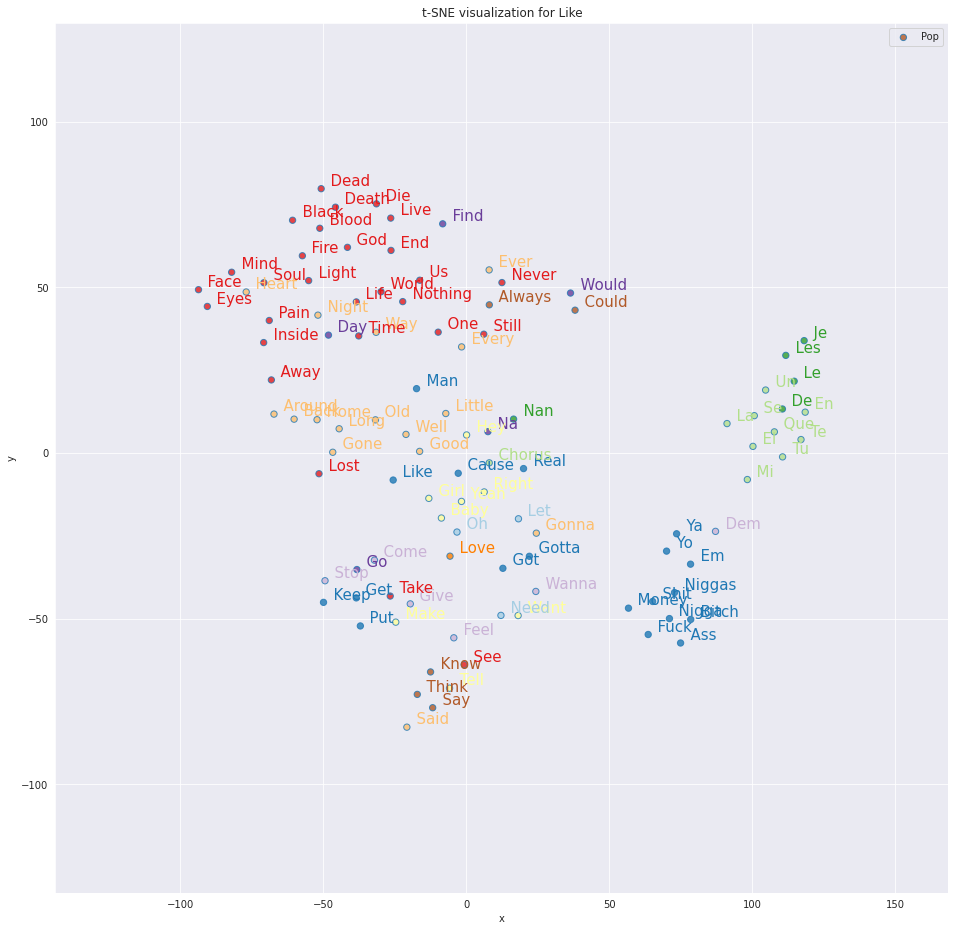

In [229]:
""" Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
its list of most similar words, and a list of words.
"""
#Compute tSNE transformation to 2D for all words, based on their word vectors
#Plot the list of the top significant words in 2D. Next to each word output its text. The color of each point should indicate the genre for which it is most significant.

# Reduces the dimensionality from 3000 to 50 dimensions with PCA
reduc = PCA(n_components=21).fit_transform(word_vertor)

# Finds t-SNE coordinates for 2 dimensions
np.set_printoptions(suppress=True)

Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)

# Sets everything up to plot
df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                   'y': [y for y in Y[:, 1]],
                   'words': top_significant_words,
                   'color': word_colors,
                   'gener':end_gener})


fig, _ = plt.subplots()
fig.set_size_inches(16, 16)

# Basic plot
p1 = sns.regplot(data=df,
                 x="x",
                 y="y",
                 fit_reg=False,
                 marker="o",
                 scatter_kws={'s': 40,
                              'facecolors': df['color']
                             }
                 
                ,label=df['gener']
                )

# Adds annotations one by one with a loop
for line in range(0, df.shape[0]):
     p1.text(df["x"][line],
             df['y'][line],
             '  ' + df["words"][line].title(),
             horizontalalignment='left',
             verticalalignment='bottom', size='medium',
             color=df['color'][line],
             weight='normal'
            ).set_size(15)


plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)

plt.title('t-SNE visualization for {}'.format(word.title()))

plt.legend(["Pop","Hip-Hop","Not Available","Other", "Rock" ,"Metal" ,"Country","Jazz" ,"Electronic" ,"Folk" ,"R&B","Indie"])




## Text Classification
In this section, you'll build a text classifier, determining the genre of a song based on its lyrics.

### Text classification using Bag-of-Words
Build a Naive Bayes classifier based on the bag of Words.  
You will need to divide your dataset into a train and test sets.

Show the confusion matrix.

Show the classification report - precision, recall, f1 for each class.

### Text classification using Word Vectors
#### Average word vectors
Do the same, using a classifier that averages the word vectors of words in the document.

#### TfIdf Weighting
Do the same, using a classifier that averages the word vectors of words in the document, weighting each word by its TfIdf.


### Text classification using ConvNet
Do the same, using a ConvNet.  
The ConvNet should get as input a 2D matrix where each column is an embedding vector of a single word, and words are in order. Use zero padding so that all matrices have a similar length.  
Some songs might be very long. Trim them so you keep a maximum of 128 words (after cleaning stop words and rare words).  
Initialize the embedding layer using the word vectors that you've trained before, but allow them to change during training.  

Extra: Try training the ConvNet with 2 slight modifications:
1. freezing the the weights trained using Word2vec (preventing it from updating)
1. random initialization of the embedding layer

You are encouraged to try this question on your own.  

You might prefer to get ideas from the paper "Convolutional Neural Networks for Sentence Classification" (Kim 2014, [link](https://arxiv.org/abs/1408.5882)).

There are several implementations of the paper code in PyTorch online (see for example [this repo](https://github.com/prakashpandey9/Text-Classification-Pytorch) for a PyTorch implementation of CNN and other architectures for text classification). If you get stuck, they might provide you with a reference for your own code.